# Introduction 

During today's tutorial, we're going to do a quick tutorial on deep learning applied to the well-studied problem of **image classification**. Following the tutorial, we're going to do a fun contest in the area of classification.

A commonly used dataset for image classification is ImageNet, which contains more than **14 million images**. 

![ImageNet](http://1.bp.blogspot.com/-s3RtVPKoELQ/VUPHGKDmscI/AAAAAAAAOEU/SMriMK94c9E/s1600/ca-imagenet.jpg)

Fortunately, because of the large amount of interest and work in this domain, we don't need to start from scratch. PyTorch makes a number of pre-trained image classification models accessible to us.


In [1]:
from IPython import display
from PIL import Image
from torch import nn
from torch.autograd import Variable
from torchvision import models, transforms

import numpy as np
import torch

In [2]:
# Define a global transformer to appropriately scale images and subsequently convert them to a Tensor.
img_size = 224
loader = transforms.Compose([
  transforms.Resize(img_size),
  transforms.CenterCrop(img_size),
  transforms.ToTensor(),
]) 
def load_image(filename):
    """
    Simple function to load and preprocess the image.

    1. Open the image.
    2. Scale/crop it and convert it to a float tensor.
    3. Convert it to a variable (all inputs to PyTorch models must be variables).
    4. Add another dimension to the start of the Tensor (b/c VGG expects a batch).
    5. Move the variable onto the GPU.
    """
    image = Image.open(filename).convert('RGB')
    image_tensor = loader(image).float()
    image_var = Variable(image_tensor).unsqueeze(0)
    return image_var.cuda()

# Problem Statement

The problem that we're going to be working on today is distinguishing **hotdogs** and **not hotdogs**. This [clip](https://www.youtube.com/watch?v=ACmydtFDTGs) motivates this problem really well! :)

Let's take a look at some of the images we have in our dataset.

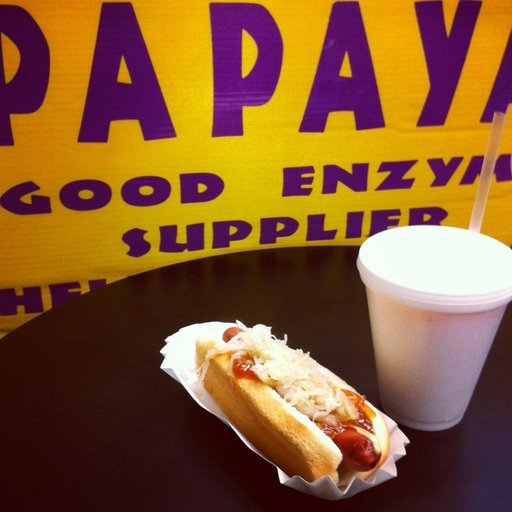

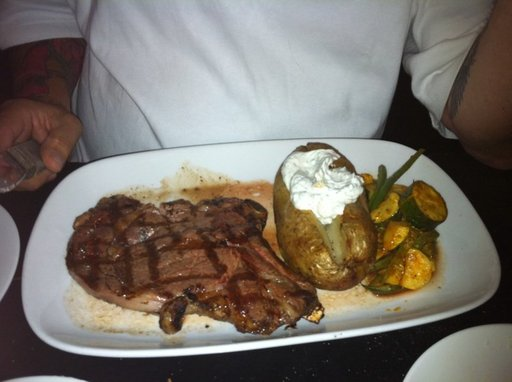

In [5]:
display.display(display.Image("data/train/hot_dog/1000288.jpg"))
display.display(display.Image("data/train/not_hot_dog/100135.jpg"))

# Convolutional Neural Networks

For a high-level understanding of how convolutional neural networks (CNNs) work, we have to consider three types of layers.

1. **Fully-Connected Layers**

![FCNN](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

2. **Convolutional Layers**

A good visual can be found [here](http://www.cs.ubc.ca/~lsigal/532L/Lecture4.pdf#page=23).

3. **Pooling Layers**

![Pooling](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

# VGG

![VGG](http://www.renom.jp/_images/vgg16.png)

# ResNet

![ResNet](http://lanbing510.info/public/img/posts/resnet/4.gif)

# AlexNet

![AlexNet](https://www.researchgate.net/profile/Angel_Sappa/publication/313786493/figure/fig2/AS:552464787410944@1508729277790/Fig-3-Illustration-of-the-architecture-of-the-AlexNet-CNN-see-3-for-details-about.png)

In [100]:
# Load in a VGG model
vgg_model = models.vgg16(pretrained=True).cuda()
vgg_model.eval()

# Let's see what the model looks like.
vgg_model

VGG (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU (inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU (inplace)
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU (inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU (inplace)
    (16): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [101]:
# Remove the last layer of the VGG model
modified_classifier = nn.Sequential(*list(vgg_model.classifier.children())[:-1])
modified_classifier.eval()
vgg_model.classifier = modified_classifier

vgg_model

VGG (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU (inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU (inplace)
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU (inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU (inplace)
    (16): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [114]:
resnet_model = models.resnet152(pretrained=True).cuda()
resnet_model.eval()

# Let's see what the model looks like.
resnet_model

# Let's remove the last layer
resnet_model.fc = nn.Sequential()
resnet_model

ResNet (
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU (inplace)
  (maxpool): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (layer1): Sequential (
    (0): Bottleneck (
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (downsample): Sequential (
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      )
    )
    (1): Bott

In [116]:
alexnet_model = models.alexnet(pretrained=True).cuda()
alexnet_model.eval()

# Let's see what the model looks like.
alexnet_model


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/shikib/.torch/models/alexnet-owt-4df8aa71.pth
100.0%


AlexNet (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Dropout (p = 0.5)
    (1): Linear (9216 -> 4096)
    (2): ReLU (inplace)
    (3): Dropout (p = 0.5)
    (4): Linear (4096 -> 4096)
    (5): ReLU (inplace)
    (6): Linear (4096 -> 1000)
  )
)

In [117]:
# Let's remove the last layer
modified_classifier = nn.Sequential(*list(alexnet_model.classifier.children())[:-1])
modified_classifier.eval()
alexnet_model.classifier = modified_classifier

alexnet_model

AlexNet (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Dropout (p = 0.5)
    (1): Linear (9216 -> 4096)
    (2): ReLU (inplace)
    (3): Dropout (p = 0.5)
    (4): Linear (4096 -> 4096)
    (5): ReLU (inplace)
  )
)

In [132]:
import os

def get_data(folder, model, files=[]):
    """
    Get a numpy array representing features for the images within the folder.
    """
    data = []
    if len(files) == 0:
        files = os.listdir(folder)
        
    for filename in files:
        # Load the image in
        img = load_image(folder + filename)
        
        # Pass it through the model
        result = model(img).data[0].cpu().numpy()
        
        # Add to the data list
        data.append(result)
    
    return np.array(data)

# Generate the indices for random initialization. Ensure that these are constant 
# through different runs of the method, to allow for easy ensembling.
indices = np.random.permutation(249*2)
def build_data(data_folder, model, model_name):
    """
    Given some information, generate all of the vectors and save them accordingly.
    """
    train_positive = get_data(data_folder + "train/hot_dog/", model)
    train_negative = get_data(data_folder + "train/not_hot_dog/", model)
    
    # Print the shapes
    print(train_positive.shape)
    print(train_negative.shape)
    
    # Build the training data
    train_X = np.concatenate((train_positive, train_negative))
    train_y = np.array([1] * len(train_positive) + [0] * len(train_negative))

    # Shuffle the training data
    train_X = train_X[indices]
    train_y = train_y[indices]

    # Save training data to file
    np.save(model_name + "_train_X.npy", train_X)
    print(train_y)
    np.save(model_name + "_train_y.npy", train_y)
    
    # Build the testing data
    test_files = ['63947.jpg', '66207.jpg', '566784.jpg', '840839.jpg', '28783.jpg', '623958.jpg', '13080.jpg', '80315.jpg', '602204.jpg', '138969.jpg', '64906.jpg', '29869.jpg', '57594.jpg', '724711.jpg', '183400.jpg', '413825.jpg', '40231.jpg', '37649.jpg', '382188.jpg', '69645.jpg', '571081.jpg', '514482.jpg', '14484.jpg', '49803.jpg', '82535.jpg', '23601.jpg', '54529.jpg', '146834.jpg', '531567.jpg', '24479.jpg', '85514.jpg', '9657.jpg', '68684.jpg', '15933.jpg', '24844.jpg', '707784.jpg', '42487.jpg', '547312.jpg', '26078.jpg', '520905.jpg', '593867.jpg', '397466.jpg', '36147.jpg', '380963.jpg', '502977.jpg', '745741.jpg', '19487.jpg', '583811.jpg', '745739.jpg', '38615.jpg', '20532.jpg', '143012.jpg', '47388.jpg', '82274.jpg', '784362.jpg', '6709.jpg', '22489.jpg', '471340.jpg', '505584.jpg', '315602.jpg', '75638.jpg', '7394.jpg', '417155.jpg', '520065.jpg', '393123.jpg', '298744.jpg', '63878.jpg', '15420.jpg', '63480.jpg', '224850.jpg', '527633.jpg', '156135.jpg', '70218.jpg', '324480.jpg', '380645.jpg', '211824.jpg', '642331.jpg', '171875.jpg', '608168.jpg', '731744.jpg', '76271.jpg', '43924.jpg', '173995.jpg', '371082.jpg', '160274.jpg', '599728.jpg', '300150.jpg', '59445.jpg', '45035.jpg', '30395.jpg', '667655.jpg', '40449.jpg', '56337.jpg', '60633.jpg', '800992.jpg', '43376.jpg', '573731.jpg', '410713.jpg', '665987.jpg', '576265.jpg', '388733.jpg', '32556.jpg', '7847.jpg', '7056.jpg', '510674.jpg', '170212.jpg', '55639.jpg', '607287.jpg', '544416.jpg', '415744.jpg', '206995.jpg', '537584.jpg', '291354.jpg', '60207.jpg', '46246.jpg', '30892.jpg', '15580.jpg', '840832.jpg', '307874.jpg', '71511.jpg', '439441.jpg', '697329.jpg', '703550.jpg', '133245.jpg', '13983.jpg', '379311.jpg', '691952.jpg', '22080.jpg', '697073.jpg', '408504.jpg', '76466.jpg', '289472.jpg', '704107.jpg', '728442.jpg', '39461.jpg', '152106.jpg', '46401.jpg', '23739.jpg', '9547.jpg', '419255.jpg', '248122.jpg', '61822.jpg', '65128.jpg', '50193.jpg', '81332.jpg', '485835.jpg', '292683.jpg', '558890.jpg', '43886.jpg', '59497.jpg', '818233.jpg', '40094.jpg', '679424.jpg', '723890.jpg', '86528.jpg', '654831.jpg', '26489.jpg', '391898.jpg', '756061.jpg', '21327.jpg', '690327.jpg', '58856.jpg', '66533.jpg', '80750.jpg', '581166.jpg', '62484.jpg', '53233.jpg', '52934.jpg', '86782.jpg', '18985.jpg', '66183.jpg', '370167.jpg', '400228.jpg', '52510.jpg', '27410.jpg', '324507.jpg', '493727.jpg', '82946.jpg', '80215.jpg', '458164.jpg', '80190.jpg', '8119.jpg', '72090.jpg', '612440.jpg', '76061.jpg', '62084.jpg', '533521.jpg', '640478.jpg', '505563.jpg', '365524.jpg', '238581.jpg', '718939.jpg', '83538.jpg', '83053.jpg', '9555.jpg', '86812.jpg', '56409.jpg', '264487.jpg', '456751.jpg', '38349.jpg', '46325.jpg', '36042.jpg', '165005.jpg', '170452.jpg', '54252.jpg', '233179.jpg', '824342.jpg', '554307.jpg', '207335.jpg', '282294.jpg', '17304.jpg', '65097.jpg', '650514.jpg', '48073.jpg', '6261.jpg', '8350.jpg', '315747.jpg', '25026.jpg', '75537.jpg', '8917.jpg', '65608.jpg', '295307.jpg', '58787.jpg', '51368.jpg', '73697.jpg', '59144.jpg', '24159.jpg', '315220.jpg', '533172.jpg', '55601.jpg', '69414.jpg', '17394.jpg', '335113.jpg', '79489.jpg', '138937.jpg', '701763.jpg', '195251.jpg', '86180.jpg', '564558.jpg', '32693.jpg', '25414.jpg', '23184.jpg', '44035.jpg', '144956.jpg', '632174.jpg', '285214.jpg', '826706.jpg', '47115.jpg', '762910.jpg', '48506.jpg', '60844.jpg', '42252.jpg', '27330.jpg', '20797.jpg', '36081.jpg', '82772.jpg', '317564.jpg', '547307.jpg', '397696.jpg', '327851.jpg', '259418.jpg', '62663.jpg', '61656.jpg', '250715.jpg', '24145.jpg', '561681.jpg', '89027.jpg', '54685.jpg', '76021.jpg', '54461.jpg', '160523.jpg', '139177.jpg', '80887.jpg', '302949.jpg', '570799.jpg', '70456.jpg', '397071.jpg', '51481.jpg', '42609.jpg', '71719.jpg', '267988.jpg', '87020.jpg', '704826.jpg', '32199.jpg', '77677.jpg', '44449.jpg', '373912.jpg', '48151.jpg', '33783.jpg', '462004.jpg', '197257.jpg', '42125.jpg', '44810.jpg', '76464.jpg', '45896.jpg', '635715.jpg', '31881.jpg', '498141.jpg', '40762.jpg', '198641.jpg', '20787.jpg', '337987.jpg', '80865.jpg', '424960.jpg', '23199.jpg', '81543.jpg', '225367.jpg', '40947.jpg', '40944.jpg', '85452.jpg', '45059.jpg', '805852.jpg', '422730.jpg', '58448.jpg', '209306.jpg', '48208.jpg', '21440.jpg', '595636.jpg', '133012.jpg', '219922.jpg', '69328.jpg', '604245.jpg', '41693.jpg', '28387.jpg', '51678.jpg', '259058.jpg', '6926.jpg', '445366.jpg', '646412.jpg', '829968.jpg', '19143.jpg', '13719.jpg', '267629.jpg', '142835.jpg', '716049.jpg', '133015.jpg', '72716.jpg', '87246.jpg', '50277.jpg', '717652.jpg', '27963.jpg', '409435.jpg', '741637.jpg', '146227.jpg', '332886.jpg', '634232.jpg', '82578.jpg', '842474.jpg', '180961.jpg', '30731.jpg', '78171.jpg', '701201.jpg', '38337.jpg', '316636.jpg', '53393.jpg', '486658.jpg', '527074.jpg', '373020.jpg', '17688.jpg', '741652.jpg', '189511.jpg', '69564.jpg', '628106.jpg', '171607.jpg', '739229.jpg', '200438.jpg', '25784.jpg', '413426.jpg', '306950.jpg', '20215.jpg', '377852.jpg', '489624.jpg', '26279.jpg', '33259.jpg', '42954.jpg', '510955.jpg', '500771.jpg', '752871.jpg', '423659.jpg', '618167.jpg', '45817.jpg', '135628.jpg', '289042.jpg', '38442.jpg', '8984.jpg', '56449.jpg', '32666.jpg', '336873.jpg', '85398.jpg', '207291.jpg', '219273.jpg', '60819.jpg', '566965.jpg', '20983.jpg', '35430.jpg', '36370.jpg', '88158.jpg', '44859.jpg', '65685.jpg', '212515.jpg', '461937.jpg', '161911.jpg', '43636.jpg', '574379.jpg', '66858.jpg', '690320.jpg', '64960.jpg', '63099.jpg', '349375.jpg', '588881.jpg', '156126.jpg', '81939.jpg', '154409.jpg', '60069.jpg', '210861.jpg', '619671.jpg', '807481.jpg', '635712.jpg', '307557.jpg', '677481.jpg', '147874.jpg', '580378.jpg', '388827.jpg', '398941.jpg', '550512.jpg', '528022.jpg', '51533.jpg', '268919.jpg', '45200.jpg', '352638.jpg', '44578.jpg', '803307.jpg', '15787.jpg', '20627.jpg', '53217.jpg', '807265.jpg', '403561.jpg', '81779.jpg', '595968.jpg', '37565.jpg', '591179.jpg', '298757.jpg', '28996.jpg', '87125.jpg', '22777.jpg', '652826.jpg', '190809.jpg', '9053.jpg', '34793.jpg', '210271.jpg', '60306.jpg', '62622.jpg', '839783.jpg', '34632.jpg', '138933.jpg', '24656.jpg', '815805.jpg', '32004.jpg', '651101.jpg', '29204.jpg', '33485.jpg', '48052.jpg', '48840.jpg', '838604.jpg', '29417.jpg', '47909.jpg', '20087.jpg', '530316.jpg', '193755.jpg', '54540.jpg', '518867.jpg', '453463.jpg', '71701.jpg', '53758.jpg', '343270.jpg', '760045.jpg', '60655.jpg', '38768.jpg', '13023.jpg', '35235.jpg', '551784.jpg', '35133.jpg', '20777.jpg', '607289.jpg', '6229.jpg', '37384.jpg', '56240.jpg', '17969.jpg', '85375.jpg', '154545.jpg', '345704.jpg', '319114.jpg', '14142.jpg', '841980.jpg', '287752.jpg', '500768.jpg', '201986.jpg', '59675.jpg', '480916.jpg', '27415.jpg']
    test_data = get_data(data_folder + "test/", model, files=test_files)
    
    # Save testing data to file
    np.save(model_name + "_test_X.npy", test_data)

In [133]:
build_data("data/", vgg_model, "VGG")

(249, 4096)
(249, 4096)
[0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 

In [134]:
build_data("data/", resnet_model, "ResNet")
print("ResNet done")
build_data("data/", alexnet_model, "AlexNet")

(249, 2048)
(249, 2048)
[0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 

In [146]:
train_X = np.load("data/AlexNet_train_X.npy")
train_y = np.load("data/AlexNet_train_y.npy")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [147]:
test_X = np.load("data/AlexNet_test_X.npy")

clf.predict(test_X)


array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,